# EDA Recommender system

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# reading in the data and creating a path

path = "../Data/"
movies = "movies.csv"
ratings = "ratings.csv"

df_movies = pd.read_csv(path + movies)
df_ratings = pd.read_csv(path + ratings)



In [4]:
# Doing EDA on Movies data

print(df_movies.head()) # Contains columns movieId, title, genres
print(df_movies.shape) # 58098 rows and 3 columns
print(df_movies.info()) # No null values, tilte is an object, genres is an object
# checking for duplicates
print(df_movies.duplicated().sum()) # 0 duplicates


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
(58098, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
None
0


In [5]:
# same for ratings data
print(df_ratings.head()) # Contains columns userId, movieId, rating, timestamp
print(df_ratings.shape) # 27753444 rows and 4 columns
print(df_ratings.info()) # No null values, userId is an int, movieId is an int, rating is a float, timestamp is an int
# checking for duplicates
print(df_ratings.duplicated().sum()) # 0 duplicates

   userId  movieId  rating   timestamp
0       1      307     3.5  1256677221
1       1      481     3.5  1256677456
2       1     1091     1.5  1256677471
3       1     1257     4.5  1256677460
4       1     1449     4.5  1256677264
(27753444, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB
None
0


In [6]:
# Merging the two dataframes
df = pd.merge(df_movies, df_ratings, on = "movieId")


In [7]:
# Converting timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit = "s")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,4.0,2005-04-17 19:25:37
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,5.0,2000-01-26 11:24:10
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,2015-09-13 18:36:15
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0,2013-06-09 20:34:23
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,4.0,2009-03-21 08:03:51


In [8]:
# dropping movies with less than 10000 ratings
#df = df.groupby("title").filter(lambda x: len(x) >= 10000).reset_index(drop = True) # removes 13343761 entries
#df.head()

In [9]:
# finding the most negative user
df.groupby("userId").mean().sort_values("rating", ascending = True).head()

C:\Users\Agam\AppData\Local\Temp\ipykernel_19132\3529508978.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("userId").mean().sort_values("rating", ascending = True).head()


,movieId,rating
userId,,
246381,342.000000,0.5
117977,1304.950000,0.5
163134,2021.000000,0.5
61279,3593.000000,0.5
280246,4836.866667,0.5


In [10]:
# Checking how many users has a mean of 0.5 for rating
# amount of negative users

df.groupby("userId").mean().sort_values("rating", ascending = True).head(275)


C:\Users\Agam\AppData\Local\Temp\ipykernel_19132\4045367692.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("userId").mean().sort_values("rating", ascending = True).head(275)


,movieId,rating
userId,,
246381,342.000000,0.500000
117977,1304.950000,0.500000
163134,2021.000000,0.500000
61279,3593.000000,0.500000
280246,4836.866667,0.500000
...,...,...
239685,1112.777778,0.555556
250370,2181.937500,0.562500
32279,15972.687500,0.562500


In [12]:
# Finding how many reviews every movie has

df.groupby("title").count().sort_values("rating", ascending = False).head(100)

,movieId,genres,userId,rating,timestamp
title,,,,,
"Shawshank Redemption, The (1994)",97999,97999,97999,97999,97999
Forrest Gump (1994),97040,97040,97040,97040,97040
Pulp Fiction (1994),92406,92406,92406,92406,92406
"Silence of the Lambs, The (1991)",87899,87899,87899,87899,87899
"Matrix, The (1999)",84545,84545,84545,84545,84545
...,...,...,...,...,...
L.A. Confidential (1997),32553,32553,32553,32553,32553
"Clockwork Orange, A (1971)",32436,32436,32436,32436,32436
Ghost (1990),32210,32210,32210,32210,32210


In [13]:
# Checking how many different users there are
df["userId"].nunique() # 283228

283228

### Most ratings?

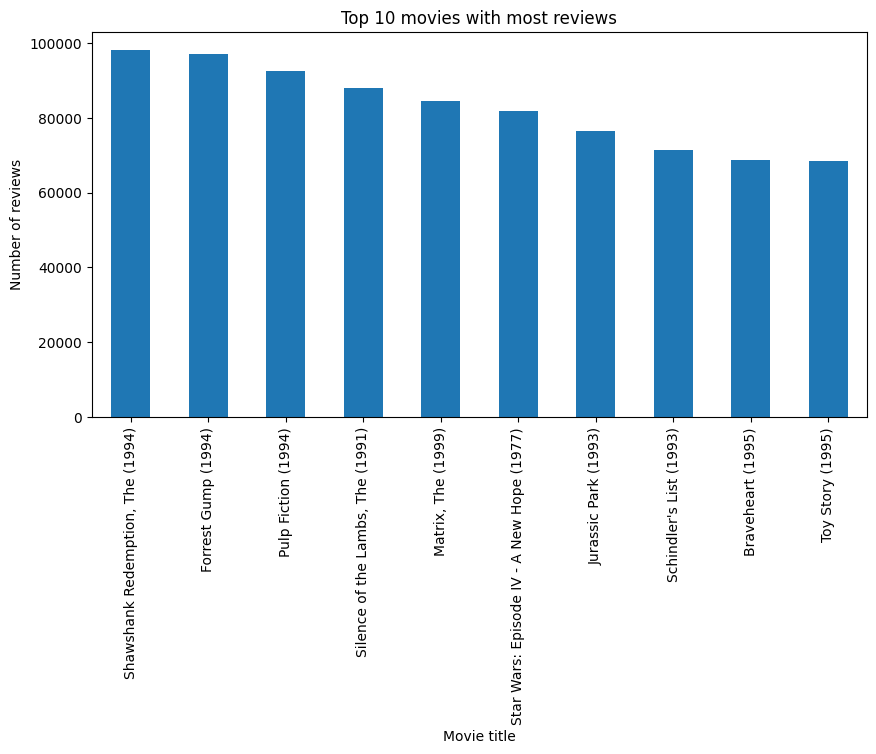

In [26]:
# What 10 movies have the most reviews
df_top_ten = df.groupby("title").count().sort_values("rating", ascending = False).head(10)
#Plotting the 10 movies with the most reviews
df_top_ten.plot(kind = "bar", y = "rating", legend = False, figsize = (10, 5))
plt.title("Top 10 movies with most reviews")
plt.xlabel("Movie title")
plt.ylabel("Number of reviews")
plt.show()

In [42]:
# loop through list of top rated movies and plot the average ratings for each movie

for movie in df_top_ten.index:
    average_rating = df[df['title'] == movie]['rating'].mean()
    print(f"{movie}: {average_rating:.2f}")

Shawshank Redemption, The (1994): 4.42
Forrest Gump (1994): 4.06
Pulp Fiction (1994): 4.17
Silence of the Lambs, The (1991): 4.15
Matrix, The (1999): 4.15
Star Wars: Episode IV - A New Hope (1977): 4.12
Jurassic Park (1993): 3.67
Schindler's List (1993): 4.26
Braveheart (1995): 4.01
Toy Story (1995): 3.89


In [43]:
# Creating a plot of amount of movies per year

# Creating a new column with the year of the movie
# creates new column with year of release
# extract the year from the title column using regex
# \( = start of expression
# (\d{4}) = 4 digits next to each other
# \) = end of expression
# $ all of the above must occur at the end of the string
# Source: https://stackoverflow.com/questions/64323346/extracting-year-from-a-column-of-string-movie-names
df["year"] = df["title"].str.extract(r"\((\d{4})\)")



,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,4.0,2005-04-17 19:25:37,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,5.0,2000-01-26 11:24:10,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,2015-09-13 18:36:15,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,4.0,2013-06-09 20:34:23,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,4.0,2009-03-21 08:03:51,1995


In [46]:
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int

NameError: name 'df_years' is not defined

In [52]:
# Creating a new dataframe with the amount of movies per year
df_year = df.groupby("year").count().sort_values("rating", ascending = False).head(100)
df_year = df_year.reset_index()

# finds all years between 1 and 2020 ()

df_year = df[(df['year'] > 1) & (df['year'] < 2022)] # removes all movies with year 0
df_year
df_year['year'].min(), df_year['year'].max()

(1874, 2018)

Text(0.5, 1.0, 'Number of movies released each year')

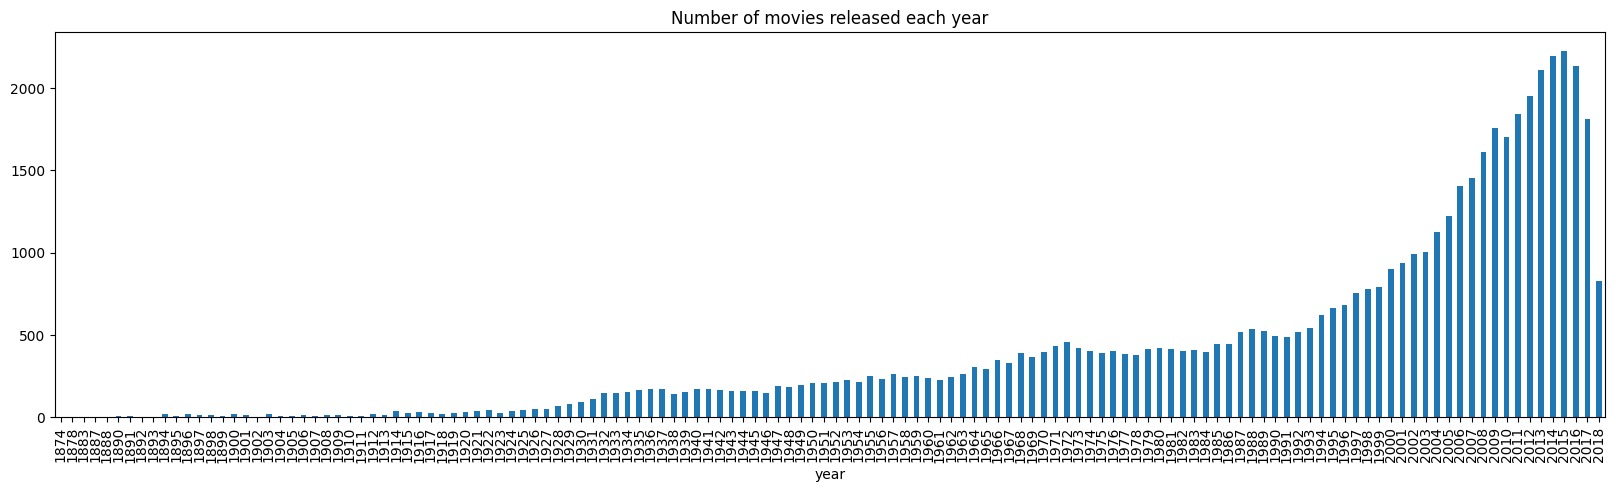

In [53]:


# plot the number of movies released each year

df_year.groupby('year')['title'].nunique().plot(kind='bar', figsize=(20, 5))
plt.title('Number of movies released each year')



C:\Users\Agam\AppData\Local\Temp\ipykernel_19132\3508161834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['decade'] = df_year['year'] // 10 * 10 #


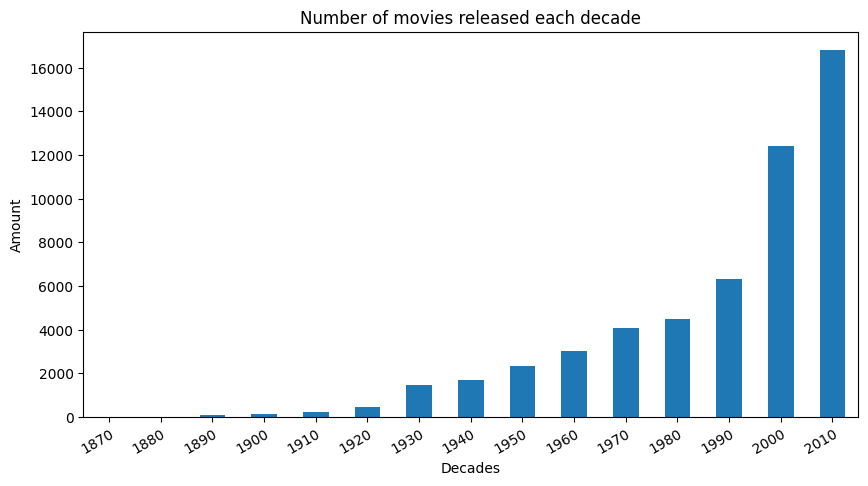

In [54]:


# groups up years in to decades which makes it easier to read the graph

df_year['decade'] = df_year['year'] // 10 * 10 # 

# change x-axis to show decades instead of years
df_year.groupby('decade')['title'].nunique().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30, rotation_mode="anchor", ha="right");
plt.xlabel('Decades')
plt.ylabel('Amount')
plt.title('Number of movies released each decade');



In [59]:
# creating a new dataframe with the amount of ratings for each movie
df_ratings = df.groupby("title").count().sort_values("rating", ascending = False).head(100)
df_ratings = df_ratings.reset_index()
df_ratings = df_ratings[["title", "rating"]]
df_ratings = df_ratings.rename(columns = {"rating": "amount_of_ratings"})




<Axes: >

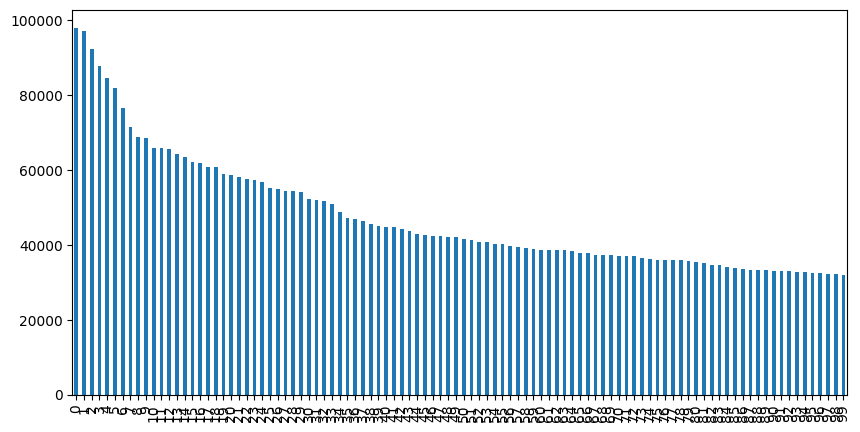

In [60]:
# plotting df_ratings
df_ratings.plot(kind = "bar", y = "amount_of_ratings", legend = False, figsize = (10, 5))

# Creating Sparse Matrix

In [15]:
# Following code from Kevin.

from scipy.sparse import csr_matrix

# picking out columns to use
movies = pd.Categorical(df_ratings['movieId'])
users = pd.Categorical(df_ratings['userId'])

# creating sparse matrix
mat_movies_users = csr_matrix((df_ratings['rating'], (movies.codes, users.codes)))


In [19]:
# creating a dataframe from the sparse matrix
df_mat_movies_users = pd.DataFrame.sparse.from_spmatrix(mat_movies_users, index = movies.categories, columns = users.categories)

In [20]:
df_mat_movies_users

,1,2,3,4,5,6,7,8,9,10,...,283219,283220,283221,283222,283223,283224,283225,283226,283227,283228
1,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5
2,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
